Insurance Prediciton

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score
from sklearn.linear_model import LinearRegression

In [167]:
df = pd.read_csv("../../Datasets/insurance.csv")

In [168]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [169]:
df.shape

(1338, 7)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [171]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [172]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

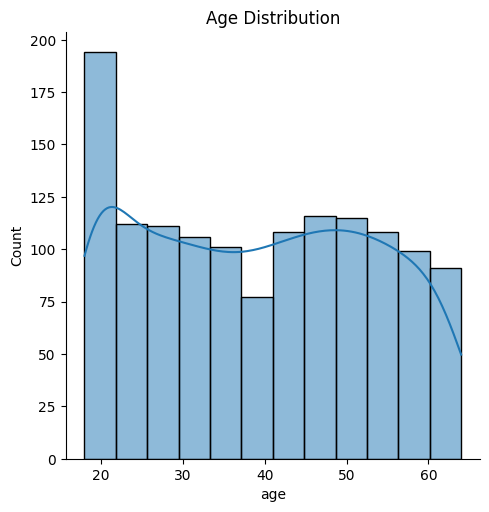

In [173]:
sns.displot(data= df["age"], kde=True) # kde = kernel density estimation
plt.title("Age Distribution")

<Axes: xlabel='sex', ylabel='count'>

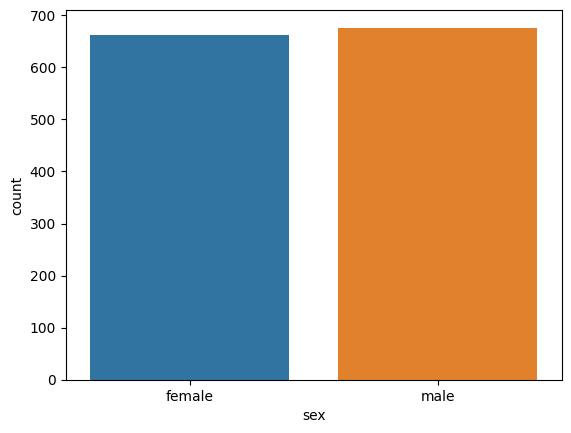

In [174]:
sns.countplot(x ="sex" , data = df) # countplot is used to count the number of occurences of each category in a column

C:\Users\arsha\AppData\Local\Temp\ipykernel_12200\884196786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"], kde=True , color="red")


<Axes: xlabel='bmi', ylabel='Density'>

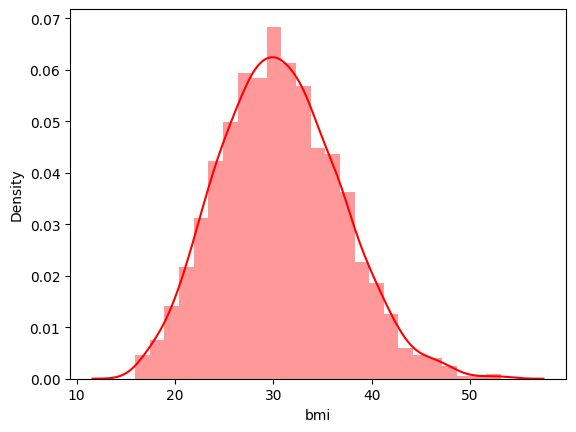

In [175]:
sns.distplot(df["bmi"], kde=True , color="red") #distplot is used to plot the distribution of a univariate set of observations

In [176]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
encoding = ["sex" , "smoker" , "region"]
for i in encoding:
    df[i]= lab.fit_transform(df[i])
    print(df)

      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28   

In [177]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [178]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

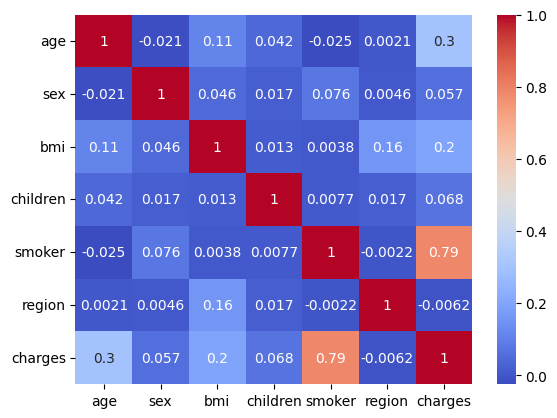

In [179]:
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm") # annot = True to show the values

In [180]:
x = df.iloc[:, :-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [181]:
y = df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [182]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = .2, random_state=0)

In [183]:
lr = LinearRegression()

In [184]:
lr.fit(x_train , y_train)

LinearRegression()

In [185]:
y_pred = lr.predict(x_test)

In [186]:
rscore = r2_score(y_test , y_pred)
rscore

0.799874714544996

In [187]:
import pickle # to save the model
with open("ins_model.pkl","wb") as f:
    pickle.dump(lr , f)

In [191]:
with open("ins_model.pkl","rb") as f: # to load the model
   mp = pickle.load(f)

In [192]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [197]:
input = [[28	,1	,33.000	,3	,0	,2]]
pred = mp.predict(input)
print(pred)

[7016.92051107]


c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
